<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
</p>
<p>
<div align="right">
<font size="2">SKKU AORC 2017</font>
</div>

<br>
<p>
<div align="center">
<b>abstract</b><br>
<font size="3">A suite of tools to interact with the <a href="http://oeis.org">OEIS</a></font>
</div>
</p>

In [1]:
'''
THIS CELL IS DEDICATED TO GENERATE TALK STUFF
'''

from functools import wraps
from IPython.display import Markdown

github_io = 'http://massimo-nocentini.github.io'

def md(f):
    @wraps(f)
    def M(*args, **kwds):
        return Markdown(f(*args, **kwds))
    
    return M

@md
def toc():
    c = '''
- suite
    - crawler
    - pretty printer
    - grapher
- use cases
'''
    return c

In [2]:
__AUTHOR__ = ('Massimo Nocentini',
              'massimo.nocentini@unifi.it',
              'https://github.com/massimo-nocentini/')

__ADVISOR__ = ('prof. Donatella Merlini',
               'donatella.merlini@unifi.it')

__SELF__ = github_io + '/PhD/skku-aorc-2017/oeistools.html#/'

# toc

- suite of `console` programs
    - crawler
    - pretty printer
    - grapher
- API and Jupyter notebook interfaces

# crawler

- a console program
- fetch sequences recursively, according to their *cross refs*
- *state of the art* impl respect to asynchronous
    - requires Python 3.6, namely the latest release
    - no threads, race conditions, data sync
    - lies on `async/await` Python primitives only
    - 250 lines of code
- *cache* a portion of the OEIS to speed up repeated lookups
- restart from the cache you have already fetched
- support configuration of *degree of parallelism*
    - *too fast, dude!* don't let the OEIS ban you ;)
    

## help & usage
the following is the companion description, in *Unix style*:

In [3]:
!python3.6 ../../src/crawling.py --help

usage: crawling.py [-h] [--clear-cache] [--restart] [--workers WORKERS]
                   [--log-level {DEBUG,INFO,WARNING,ERROR,CRITICAL}]
                   [--cache-dir CACHE_DIR] [--progress-mark PROGRESS_MARK]
                   [S [S ...]]

OEIS Crawler.

positional arguments:
  S                     Sequence to fetch, given in the form Axxxxxx

optional arguments:
  -h, --help            show this help message and exit
  --clear-cache         Clear cache of sequences, according to --cache-dir
  --restart             Build fringe from cached sequences (defaults to False)
  --workers WORKERS     Degree of parallelism (defaults to 10)
  --log-level {DEBUG,INFO,WARNING,ERROR,CRITICAL}
                        Logger verbosity (defaults to ERROR)
  --cache-dir CACHE_DIR
                        Cache directory (defaults to ./fetched/)
  --progress-mark PROGRESS_MARK
                        Symbol for fetched event (defaults to ●)


## fetching

commando to download two sequences, the *Fibonacci* and *Catalan* numbers respectively:

In [9]:
!python3.6 ../../src/crawling.py A000045 A000108 --cache-dir=../../src/fetched/

●●●●●●●●●●●^C

fetched 12 new sequences:
{'A000108', 'A002420', 'A003046', 'A000081', 'A167893', 'A033184', 'A032443', 'A038003', 'A001791', 'A120303', 'A000045', 'A014138'}


## restarting

if the cache contains sequences, we restart from the set of their *cross refs*, recursively:

In [10]:
!python3.6 ../../src/crawling.py --restart --cache-dir=../../src/fetched/

●●●●●●●●●●●●●●●●●^C

fetched 18 new sequences:
{'A003519', 'A091867', 'A036355', 'A068231', 'A047072', 'A038575', 'A051575', 'A105317', 'A071679', 'A099731', 'A000744', 'A059365', 'A104597', 'A137697', 'A120274', 'A000169', 'A001699', 'A100257'}


# cache summary

the following shows cache status and its content:

In [11]:
!python3.6 ../../src/crawling.py --cache-dir=../../src/fetched/

30 sequences in cache ../../src/fetched/
260 sequences in fringe for restarting


In [17]:
!ls ../../src/fetched/

A000045.json A001699.json A014138.json A038575.json A071679.json A105317.json
A000081.json A001791.json A032443.json A047072.json A091867.json A120274.json
A000108.json A002420.json A033184.json A051575.json A099731.json A120303.json
A000169.json A003046.json A036355.json A059365.json A100257.json A137697.json
A000744.json A003519.json A038003.json A068231.json A104597.json A167893.json


# pprinter

- a proxy for searching in the OEIS
- tabular representation of `data` sections
    - one and two dim matrix notation
- filters application on most result's sections
- takes advantage of cached sequences
- both __console__ and __notebook__ interfaces

## help & usage

the following is the companion description, in *Unix style*:

In [18]:
!python3.6 ../../src/pprinting.py --help

usage: pprinting.py [-h]
                    (--id ID | --seq SEQ | --query QUERY | --most-recents M)
                    [--force-fetch] [--cache-dir CACHE_DIR] [--tables-only]
                    [--start-index S] [--max-results R] [--data-only]
                    [--upper-limit U] [--comment-filter C]
                    [--formula-filter F] [--xrefs-filter X] [--link-filter L]
                    [--cite-filter R]

OEIS Pretty Printer.

optional arguments:
  -h, --help            show this help message and exit
  --id ID               Sequence id, given in the form Axxxxxx
  --seq SEQ             Literal sequence, ordered '[...]' or presence '{...}'
  --query QUERY         Open query for plain search, in the form '...'
  --most-recents M      Print the most recent sequences ranking by M in ACCESS
                        or MODIFY, looking into --cache-dir, at most --max-
                        results (defaults to None)
  --force-fetch         Bypass cache fetching again, accordi

## pprint using cache

the following command pretty prints Fibonacci numbers content with some filters

In [29]:
!python3.6 ../../src/pprinting.py \
    --id A000045 \
    --cache-dir=../../src/fetched/ \
    --comment-filter 'lambda i,c: "Barry" in c' \
    --formula-filter 'lambda i,f: i < 5'


 Fibonacci numbers: F(n) = F(n-1) + F(n-2) with F(0) = 0 and F(1) = 1.

by _N. J. A. Sloane_, 1964

_Keywords_: `nonn,core,nice,easy,hear,changed`

_Data_:
[0  1  1  2  3  5  8  13  21  34  55  89  144  233  377]

_Comments_:
    ● Fib(n+2) = Sum_{k=0..n} binomial(floor((n+k)/2),k), row sums of A046854. -
      _Paul Barry_, Mar 11 2003

_Formulae_:
    ● G.f.: x / (1 - x - x^2).
    ● G.f.: Sum_{n>=0} x^n * Product_{k=1..n} (k + x)/(1 + k*x). - _Paul D.
      Hanna_, Oct 26 2013
    ● F(n) = ((1+sqrt(5))^n-(1-sqrt(5))^n)/(2^n*sqrt(5)).
    ● Alternatively, F(n) = ((1/2+sqrt(5)/2)^n-(1/2-sqrt(5)/2)^n)/sqrt(5).
    ● F(n) = F(n-1) + F(n-2) = -(-1)^n F(-n).

_Cross references_:
    ● Cf. A039834 (signed Fibonacci numbers), A001690 (complement), A000213,
      A000288, A000322, A000383, A060455, A030186, A020695, A020701, A071679,
      A099731, A100492, A094216, A094638, A000108, A101399, A101400, A001611,
      A000071, A157725, A001911, A157726, A006327, A157727, A157728, A157729,
   

## pprint most recent

the following command pretty prints the first 3 results from fetched sequences,
according to the rank by most recent *access* time, reporting data only

In [36]:
!python3.6 ../../src/pprinting.py \
    --cache-dir=../../src/fetched/ \
    --most-recent ACCESS \
    --data-only \
    --max-results 3 \
    --upper-limit '{"list":10}'


 Fibonacci numbers: F(n) = F(n-1) + F(n-2) with F(0) = 0 and F(1) = 1.

by _N. J. A. Sloane_, 1964

_Keywords_: `nonn,core,nice,easy,hear,changed`

_Data_:
[0  1  1  2  3  5  8  13  21  34]

________________________________________________________________________________

 Number of unlabeled rooted trees with n nodes (or connected functions with a
  fixed point).

by _N. J. A. Sloane_

_Keywords_: `nonn,easy,core,nice,eigen`

_Data_:
[0  1  1  2  4  9  20  48  115  286]

________________________________________________________________________________

 Catalan numbers: C(n) = binomial(2n,n)/(n+1) = (2n)!/(n!(n+1)!). Also called
  Segner numbers.

by _N. J. A. Sloane_

_Keywords_: `core,nonn,easy,eigen,nice`

_Data_:
[1  1  2  5  14  42  132  429  1430  4862]



## tables datas

the following command pretty prints only two dims sequences

In [4]:
!python3.6 ../../src/pprinting.py \
    --query 'pascal triangle' \
    --cache-dir=../../src/fetched/ \
    --tables-only \
    --data-only \
    --max-results 2


 Pascal's triangle read by rows: C(n,k) = binomial(n,k) = n!/(k!*(n-k)!), 0 <= k
  <= n.

by _N. J. A. Sloane_ and _Mira Bernstein_, Apr 28 1994

_Keywords_: `nonn,tabl,nice,easy,core,look,hear`

_Data_:
⎡1  0  0   0    0    0   0   0   0  0⎤
⎢                                    ⎥
⎢1  1  0   0    0    0   0   0   0  0⎥
⎢                                    ⎥
⎢1  2  1   0    0    0   0   0   0  0⎥
⎢                                    ⎥
⎢1  3  3   1    0    0   0   0   0  0⎥
⎢                                    ⎥
⎢1  4  6   4    1    0   0   0   0  0⎥
⎢                                    ⎥
⎢1  5  10  10   5    1   0   0   0  0⎥
⎢                                    ⎥
⎢1  6  15  20  15    6   1   0   0  0⎥
⎢                                    ⎥
⎢1  7  21  35  35   21   7   1   0  0⎥
⎢                                    ⎥
⎢1  8  28  56  70   56   28  8   1  0⎥
⎢                                    ⎥
⎣1  9  36  84  126  126  84  36  9  1⎦

_____________________________________________________

## notebook interface

also, showing *under the hood* API

In [5]:
import pprinting

In [6]:
result = pprinting.search(id='A000045',
                          cache_info={'cache_dir':'../../src/fetched'})

In [7]:
result(comment=lambda i,c: i < 4,
       formula=lambda i,f: i < 4)

_Results for query: <a href='https://oeis.org/search?fmt=json&start=0&q=id%3AA000045'>https://oeis.org/search?fmt=json&start=0&q=id%3AA000045</a>_<br><hr><div align='center'><b><a href='http://oeis.org/A000045'>A000045</a></b>: Fibonacci numbers: F(n) = F(n-1) + F(n-2) with F(0) = 0 and F(1) = 1.<br></div>

by _N. J. A. Sloane_, 1964

_Keywords_: `nonn,core,nice,easy,hear,changed`

_Data_:

$$
\begin{array}{c|ccccccccccccccc }
    n & 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 & 11 & 12 & 13 & 14 \\
    \hline
    A000045(n) & 0 & 1 & 1 & 2 & 3 & 5 & 8 & 13 & 21 & 34 & 55 & 89 & 144 & 233 & 377
\end{array}
$$
        

_Comments_:
- Also sometimes called Lamé's sequence.
- F(n+2) = number of binary sequences of length n that have no consecutive 0's.
- F(n+2) = number of subsets of {1,2,...,n} that contain no consecutive
  integers.
- F(n+1) = number of tilings of a 2 X n rectangle by 2 X 1 dominoes.

_Formulae_:
- G.f.: x / (1 - x - x^2).
- G.f.: Sum_{n>=0} x^n * Product_{k=1..n} (k + x)/(1 + k*x). - _Paul D. Hanna_,
  Oct 26 2013
- F(n) = ((1+sqrt(5))^n-(1-sqrt(5))^n)/(2^n*sqrt(5)).
- Alternatively, F(n) = ((1/2+sqrt(5)/2)^n-(1/2-sqrt(5)/2)^n)/sqrt(5).

_Cross references_:
- Cf. <a href="http://oeis.org/A039834">A039834</a> (signed Fibonacci numbers), <a href="http://oeis.org/A001690">A001690</a> (complement), <a href="http://oeis.org/A000213">A000213</a>,
  <a href="http://oeis.org/A000288">A000288</a>, <a href="http://oeis.org/A000322">A000322</a>, <a href="http://oeis.org/A000383">A000383</a>, <a href="http://oeis.org/A060455">A060455</a>, <a href="http://oeis.org/A030186">A030186</a>, <a href="http://oeis.org/A020695">A020695</a>, <a href="http://oeis.org/A020701">A020701</a>, <a href="http://oeis.org/A071679">A071679</a>,
  <a href="http://oeis.org/A099731">A099731</a>, <a href="http://oeis.org/A100492">A100492</a>, <a href="http://oeis.org/A094216">A094216</a>, <a href="http://oeis.org/A094638">A094638</a>, <a href="http://oeis.org/A000108">A000108</a>, <a href="http://oeis.org/A101399">A101399</a>, <a href="http://oeis.org/A101400">A101400</a>, <a href="http://oeis.org/A001611">A001611</a>,
  <a href="http://oeis.org/A000071">A000071</a>, <a href="http://oeis.org/A157725">A157725</a>, <a href="http://oeis.org/A001911">A001911</a>, <a href="http://oeis.org/A157726">A157726</a>, <a href="http://oeis.org/A006327">A006327</a>, <a href="http://oeis.org/A157727">A157727</a>, <a href="http://oeis.org/A157728">A157728</a>, <a href="http://oeis.org/A157729">A157729</a>,
  <a href="http://oeis.org/A167616">A167616</a>, <a href="http://oeis.org/A059929">A059929</a>, <a href="http://oeis.org/A144152">A144152</a>, <a href="http://oeis.org/A152063">A152063</a>, <a href="http://oeis.org/A114690">A114690</a>, <a href="http://oeis.org/A003893">A003893</a>, <a href="http://oeis.org/A000032">A000032</a>, <a href="http://oeis.org/A060441">A060441</a>,
  <a href="http://oeis.org/A000930">A000930</a>, <a href="http://oeis.org/A003269">A003269</a>, <a href="http://oeis.org/A000957">A000957</a>, <a href="http://oeis.org/A057078">A057078</a>, <a href="http://oeis.org/A007317">A007317</a>, <a href="http://oeis.org/A091867">A091867</a>, <a href="http://oeis.org/A104597">A104597</a>, <a href="http://oeis.org/A249548">A249548</a>,
  <a href="http://oeis.org/A262342">A262342</a>, <a href="http://oeis.org/A001060">A001060</a>, <a href="http://oeis.org/A022095">A022095</a>.
- First row of arrays <a href="http://oeis.org/A103323">A103323</a>, <a href="http://oeis.org/A234357">A234357</a>. Second row of arrays <a href="http://oeis.org/A099390">A099390</a>, <a href="http://oeis.org/A048887">A048887</a>,
  and <a href="http://oeis.org/A092921">A092921</a> (k-generalized Fibonacci numbers).
- a(n) = <a href="http://oeis.org/A094718">A094718</a>(4, n). a(n) = <a href="http://oeis.org/A101220">A101220</a>(0, j, n).
- a(n) = <a href="http://oeis.org/A090888">A090888</a>(0, n+1) = <a href="http://oeis.org/A118654">A118654</a>(0, n+1) = <a href="http://oeis.org/A118654">A118654</a>(1, n-1) = <a href="http://oeis.org/A109754">A109754</a>(0, n) =
  <a href="http://oeis.org/A109754">A109754</a>(1, n-1), for n > 0.
- Fibonacci-Pascal triangles: <a href="http://oeis.org/A027926">A027926</a>, <a href="http://oeis.org/A036355">A036355</a>, <a href="http://oeis.org/A037027">A037027</a>, <a href="http://oeis.org/A074829">A074829</a>, <a href="http://oeis.org/A105809">A105809</a>,
  <a href="http://oeis.org/A109906">A109906</a>, <a href="http://oeis.org/A111006">A111006</a>, <a href="http://oeis.org/A114197">A114197</a>, <a href="http://oeis.org/A162741">A162741</a>, <a href="http://oeis.org/A228074">A228074</a>.
- Boustrophedon transforms: <a href="http://oeis.org/A000738">A000738</a>, <a href="http://oeis.org/A000744">A000744</a>.
- Powers: <a href="http://oeis.org/A103323">A103323</a>, <a href="http://oeis.org/A105317">A105317</a>, <a href="http://oeis.org/A254719">A254719</a>.
- Numbers of prime factors: <a href="http://oeis.org/A022307">A022307</a> and <a href="http://oeis.org/A038575">A038575</a>.
- Cf. <a href="http://oeis.org/A163733">A163733</a>.


# grapher


- represent connections according to *cross refs*
- works on your cached sequences
- draws both *digraphs* and *undirected* graphs
- builds on top of `networkx` module, layout selection
    - the API allows filtering of both vertices and edges


## help & usage

In [8]:
!python3.6 ../../src/graphing.py --help

usage: graphing.py [-h] [--directed] [--cache-dir CACHE_DIR]
                   [--graphs-dir GRAPHS_DIR] [--dpi DPI] [--layout LAYOUT]
                   F

OEIS grapher.

positional arguments:
  F                     Save image in file F.

optional arguments:
  -h, --help            show this help message and exit
  --directed            Draw directed edges
  --cache-dir CACHE_DIR
                        Cache directory (defaults to ./fetched/)
  --graphs-dir GRAPHS_DIR
                        Graphs directory (defaults to ./graphs/)
  --dpi DPI             Resolution in DPI (defaults to 600)
  --layout LAYOUT       Graph layout, choose from: {RANDOM, CIRCULAR, SHELL,
                        FRUCHTERMAN-REINGOLD, SPRING, SPECTRAL} (defaults to
                        SHELL)


In [14]:
!python3.6 ../../src/graphing.py \
    --cache-dir=../../src/fetched/ \
    --graphs-dir=./ \
    --layout SPRING \
    graph.png 

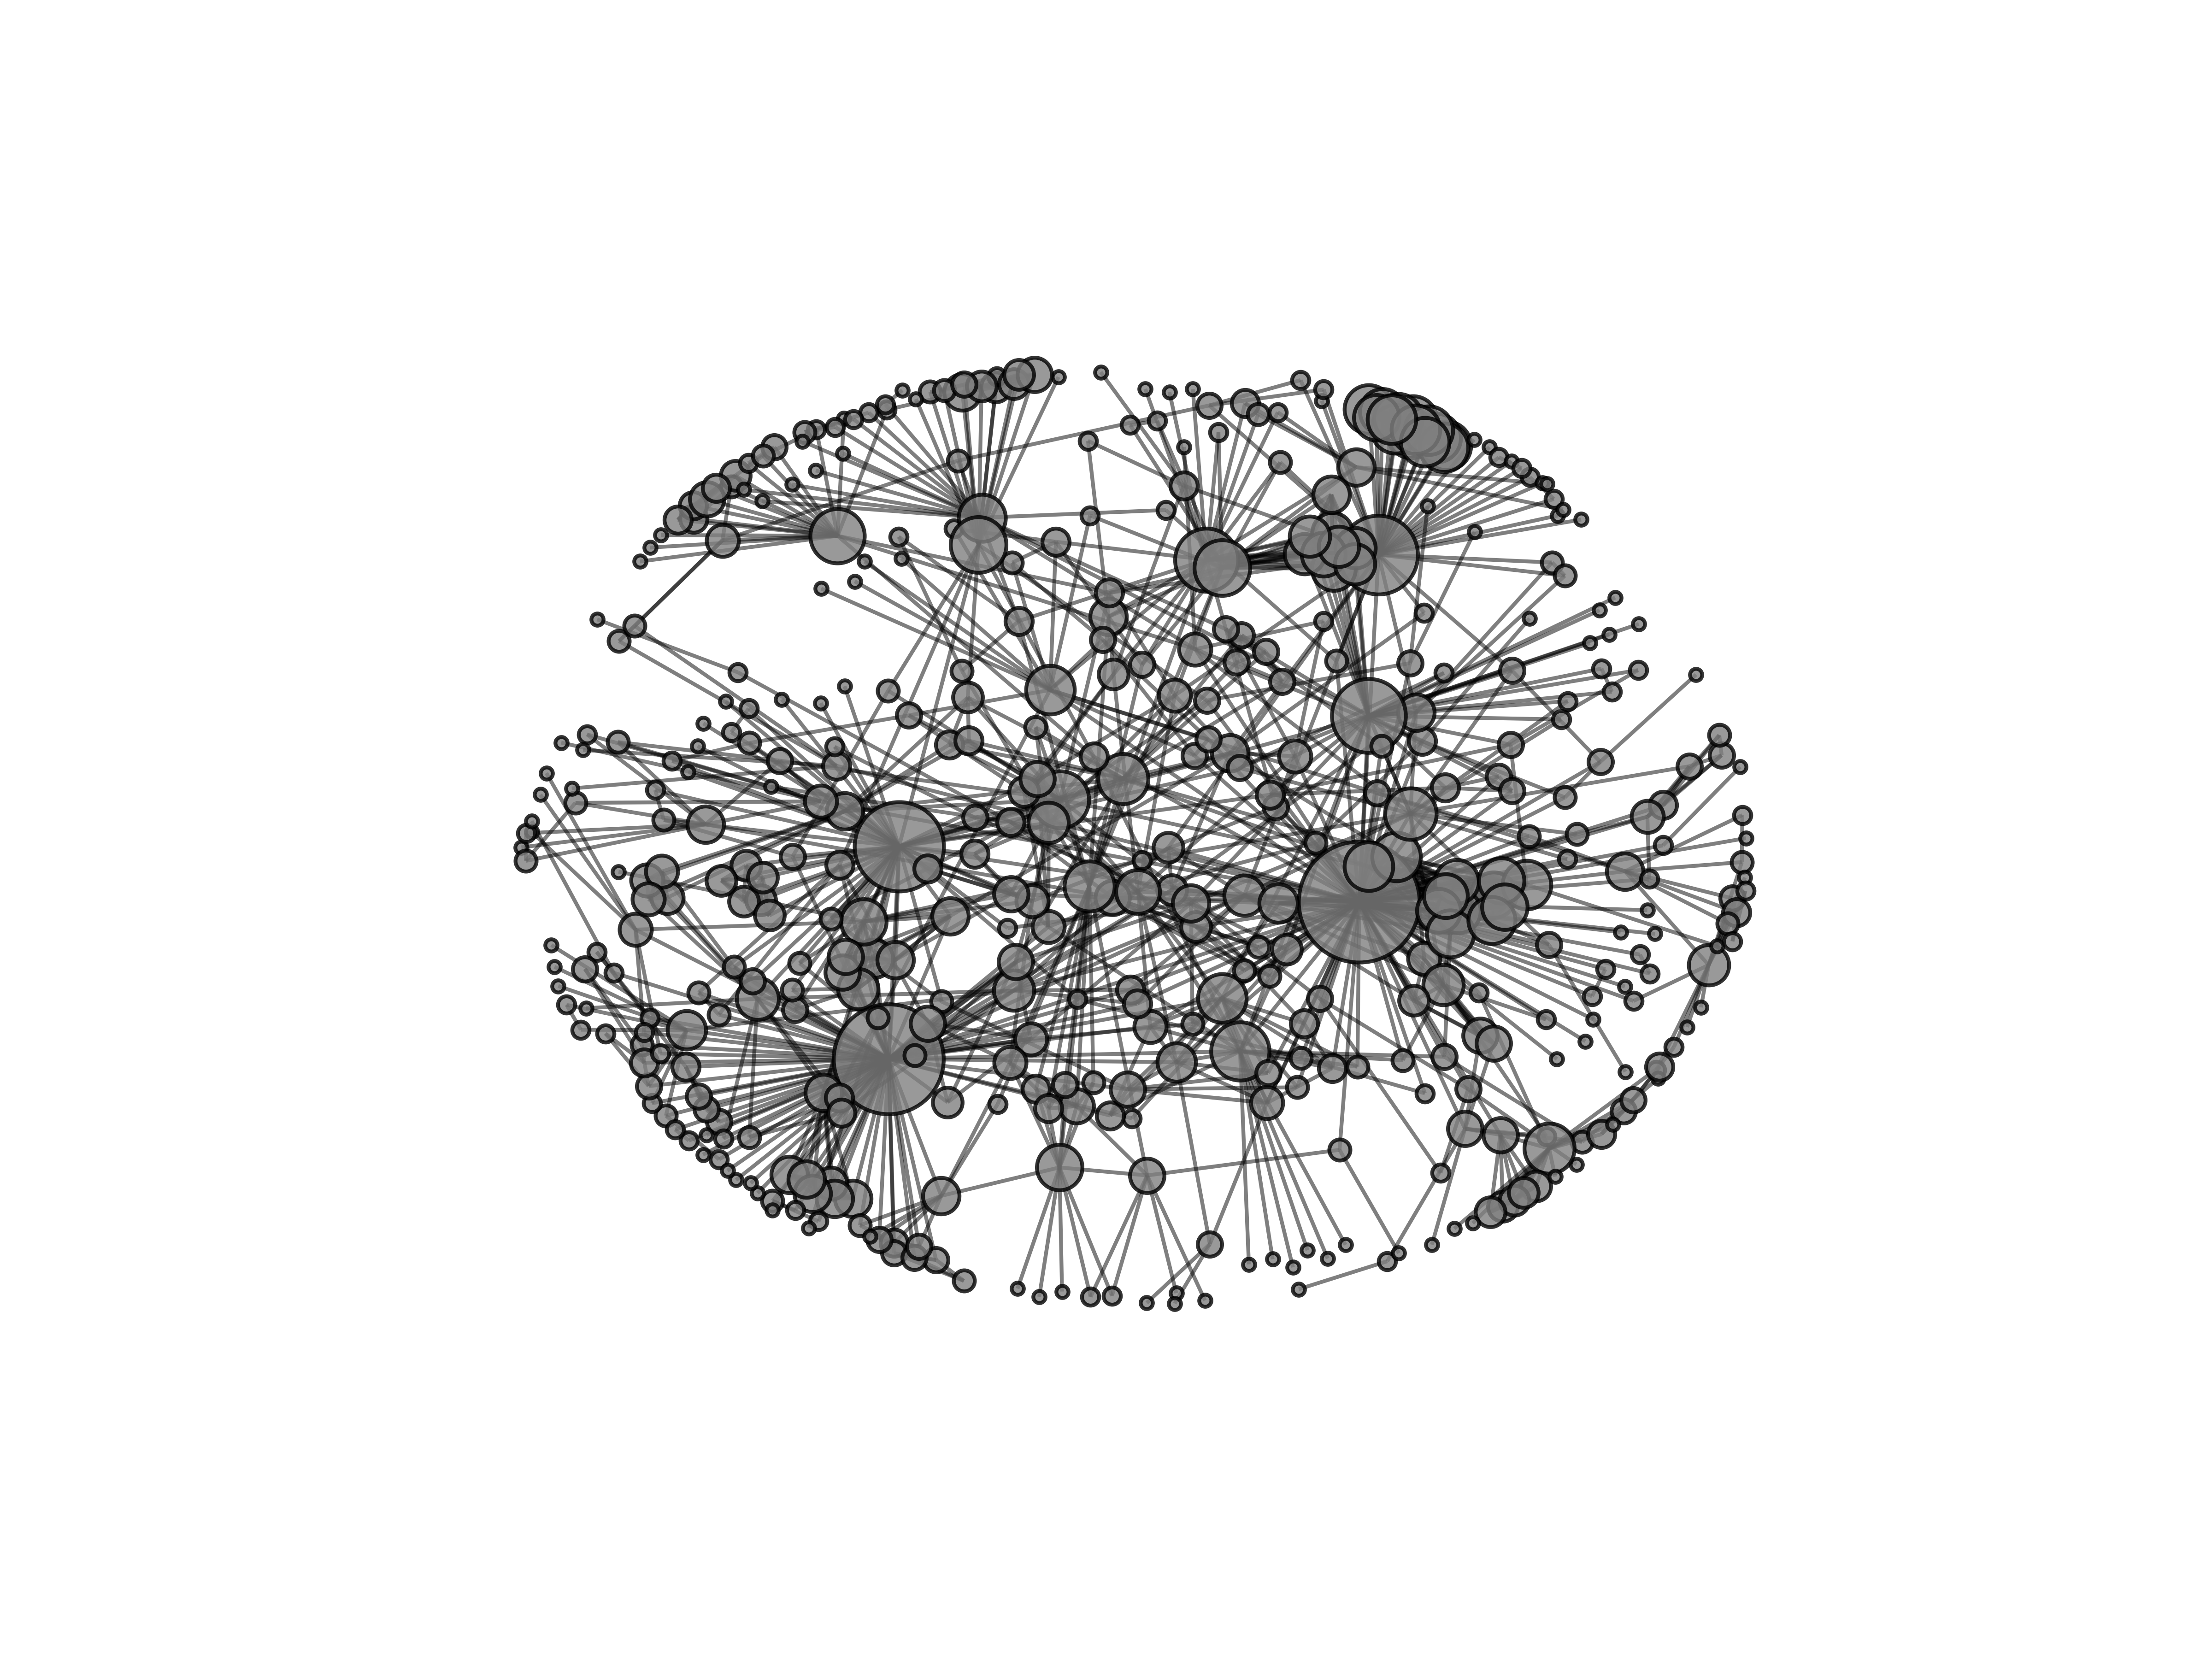

In [15]:
from IPython.display import Image
Image("./graph.png")

<font size="10">고맙습니다</font>

In [16]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


---
Compile your <i>Creative Commons</i> license at: https://creativecommons.org/choose/<br>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.